In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/세종시/data/27.세종시_월평균_가구소득.csv")
df.head()

,중분류,소분류,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상
0,전체,소계,10.9,11.0,14.6,17.8,16.4,11.9,7.3,10.1
1,읍·면·동별,조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3
2,읍·면·동별,면지역,22.7,21.0,21.2,16.7,9.1,5,1.3,3.1
3,읍·면·동별,동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4
4,성별,남자,7.3,8.5,13.6,19.3,18.0,13.3,8.2,11.9


In [3]:
df = df[1:4]
df

,중분류,소분류,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상
1,읍·면·동별,조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3
2,읍·면·동별,면지역,22.7,21.0,21.2,16.7,9.1,5,1.3,3.1
3,읍·면·동별,동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4


In [4]:
df = df.drop(['중분류'], axis=1)
df

,소분류,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상
1,조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3
2,면지역,22.7,21.0,21.2,16.7,9.1,5,1.3,3.1
3,동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4


In [5]:
df = df.set_index('소분류')
df

,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상
소분류,,,,,,,,
조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3
면지역,22.7,21.0,21.2,16.7,9.1,5,1.3,3.1
동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4


In [6]:
df = df.replace('-', '0')

In [7]:
df[['100만원 미만', '500~600만원 미만', '600~700만원 미만', '700만원 이상']] = df[['100만원 미만', '500~600만원 미만', '600~700만원 미만', '700만원 이상']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 조치원읍 to 동지역
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   100만원 미만      3 non-null      float64
 1   100~200만원 미만  3 non-null      float64
 2   200~300만원 미만  3 non-null      float64
 3   300~400만원 미만  3 non-null      float64
 4   400~500만원 미만  3 non-null      float64
 5   500~600만원 미만  3 non-null      float64
 6   600~700만원 미만  3 non-null      float64
 7   700만원 이상      3 non-null      float64
dtypes: float64(8)
memory usage: 216.0+ bytes


In [8]:
df

,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상
소분류,,,,,,,,
조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3
면지역,22.7,21.0,21.2,16.7,9.1,5.0,1.3,3.1
동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4


In [9]:
df['저소득층'] = df['100만원 미만']+df['100~200만원 미만']
df['중산층'] = df['200~300만원 미만']+df['300~400만원 미만']+df['400~500만원 미만']+df['500~600만원 미만']+df['600~700만원 미만']
df['고소득층'] = df['700만원 이상']
df

,100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600~700만원 미만,700만원 이상,저소득층,중산층,고소득층
소분류,,,,,,,,,,,
조치원읍,25.7,18.6,16.6,13.3,12.7,6.6,3.2,3.3,44.3,52.4,3.3
면지역,22.7,21.0,21.2,16.7,9.1,5.0,1.3,3.1,43.7,53.3,3.1
동지역,2.6,5.4,11.8,19.4,19.9,15.8,10.6,14.4,8.0,77.5,14.4


In [10]:
df.drop(['100만원 미만','100~200만원 미만','200~300만원 미만','300~400만원 미만','400~500만원 미만','500~600만원 미만','600~700만원 미만','700만원 이상'],axis=1, inplace=True)
df

,저소득층,중산층,고소득층
소분류,,,
조치원읍,44.3,52.4,3.3
면지역,43.7,53.3,3.1
동지역,8.0,77.5,14.4


In [11]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [12]:
plt.rc('font', family='NanumBarunGothic')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

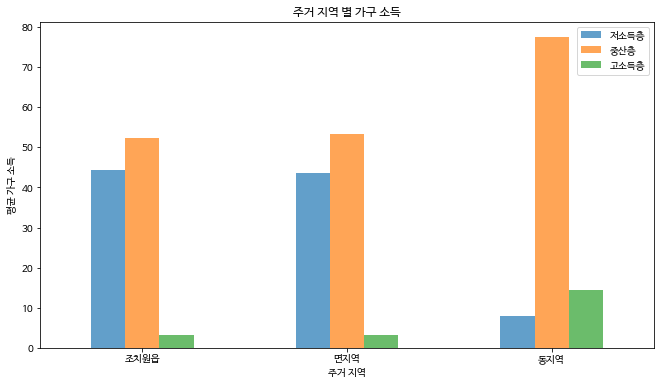

In [14]:
df.plot(kind='bar', figsize=(11,6), stacked=False, alpha=0.7)
plt.title('주거 지역 별 가구 소득')
plt.xlabel('주거 지역')
plt.ylabel('평균 가구 소득')
plt.xticks(rotation = 0 )